#EVALUATION OF THE MODELS
* Evaluating the trained models MLP model compressed version and uncompressed version


In [ ]:
!pip install scikit-learn tensorflow matplotlib


#Importing Required Libraries
* Imporitng the required libraries and mounting the drive to train and evaluate the model

In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns

import time
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Evalution Scripts


#Uncompressed Model

In [1]:
import tensorflow as tf, numpy as np, time, os

X_test = np.load("/content/drive/MyDrive/PG-PROJECT/X_test.npy").astype(np.float32)
y_test = np.load("/content/drive/MyDrive/PG-PROJECT/y_test.npy")

model = tf.keras.models.load_model("/content/drive/MyDrive/PG-PROJECT/baseline_mlp_model.h5")

start = time.time()
preds = model.predict(X_test)
duration = time.time() - start

y_pred_uncompressed = np.argmax(preds, axis=1)
acc = np.mean(y_pred_uncompressed == y_test)
size = os.path.getsize("/content/drive/MyDrive/PG-PROJECT/baseline_mlp_model.h5") / 1024**2

print(f"Uncompressed Accuracy: {acc:.4f}")
print(f"Size: {size:.2f} MB")
print(f"Inference Time: {duration:.2f} s")

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Uncompressed Accuracy: 0.9845
Size: 0.06 MB
Inference Time: 0.32 s


#Compressed Model

In [7]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/PG-PROJECT/mlp_quantized.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

start = time.time()
compressed_preds = []
for i in range(len(X_test)):
    input_data = np.expand_dims(X_test[i], axis=0)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    compressed_preds.append(output[0])
duration = time.time() - start

compressed_preds = np.array(compressed_preds)
y_pred_compressed = np.argmax(compressed_preds, axis=1)
acc = np.mean(y_pred_compressed == y_test)
size = os.path.getsize("/content/drive/MyDrive/PG-PROJECT/mlp_quantized.tflite") / 1024**2

print(f"Compressed Accuracy: {acc * 100:.2f}%")
print(f"Size: {size:.2f} MB")
print(f"Inference Time: {duration:.2f} s")

Compressed Accuracy: 98.54%
Size: 0.01 MB
Inference Time: 0.01 s


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


#  Confusion Matrices

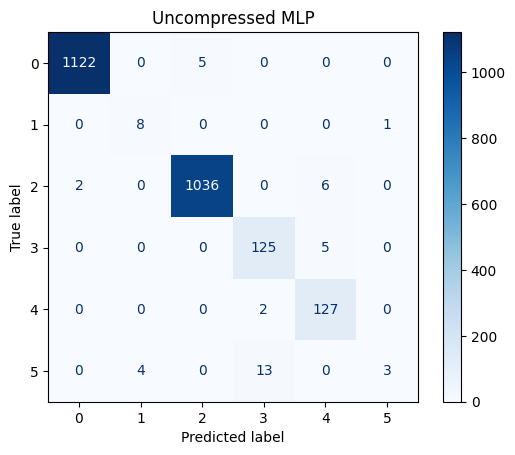

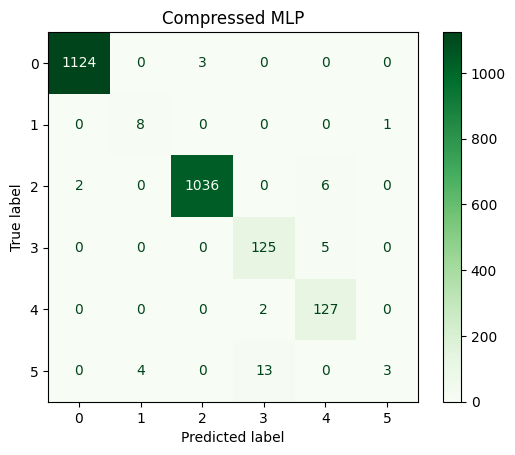

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Uncompressed
cm1 = confusion_matrix(y_test, y_pred_uncompressed)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap="Blues")
plt.title("Uncompressed MLP")
plt.show()

# Compressed
cm2 = confusion_matrix(y_test, y_pred_compressed)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap="Greens")
plt.title("Compressed MLP")
plt.show()

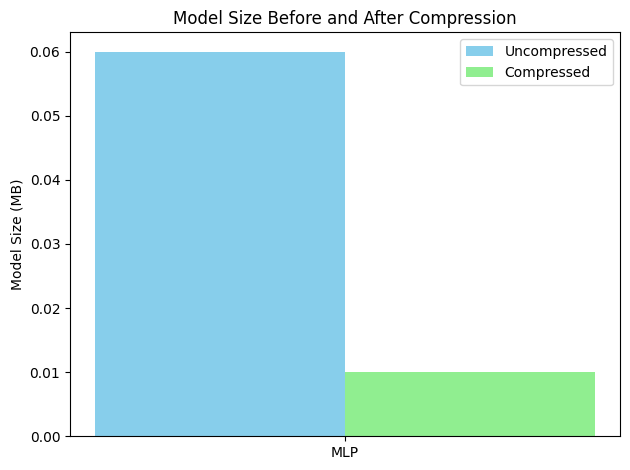

In [6]:
import matplotlib.pyplot as plt
import numpy as np

models = ['MLP']
uncompressed_size = [0.06]
compressed_size = [0.01]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, uncompressed_size, width, label='Uncompressed', color='skyblue')
ax.bar(x + width/2, compressed_size, width, label='Compressed', color='lightgreen')

ax.set_ylabel('Model Size (MB)')
ax.set_title('Model Size Before and After Compression')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()

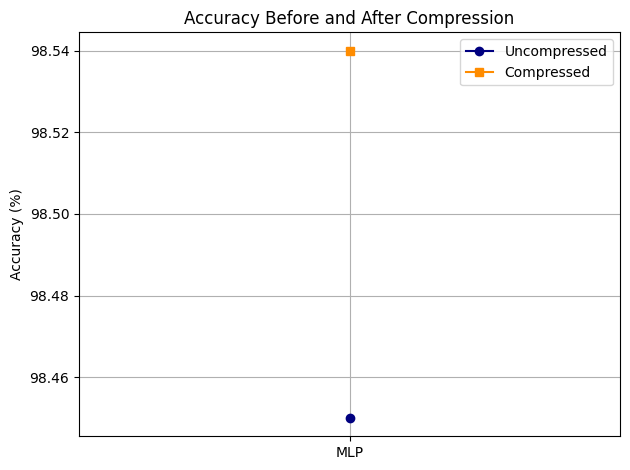

In [8]:
accuracy_uncompressed = [98.45]
accuracy_compressed = [98.54]

plt.plot(models, accuracy_uncompressed, marker='o', label='Uncompressed', color='navy')
plt.plot(models, accuracy_compressed, marker='s', label='Compressed', color='darkorange')

plt.ylabel('Accuracy (%)')
plt.title('Accuracy Before and After Compression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


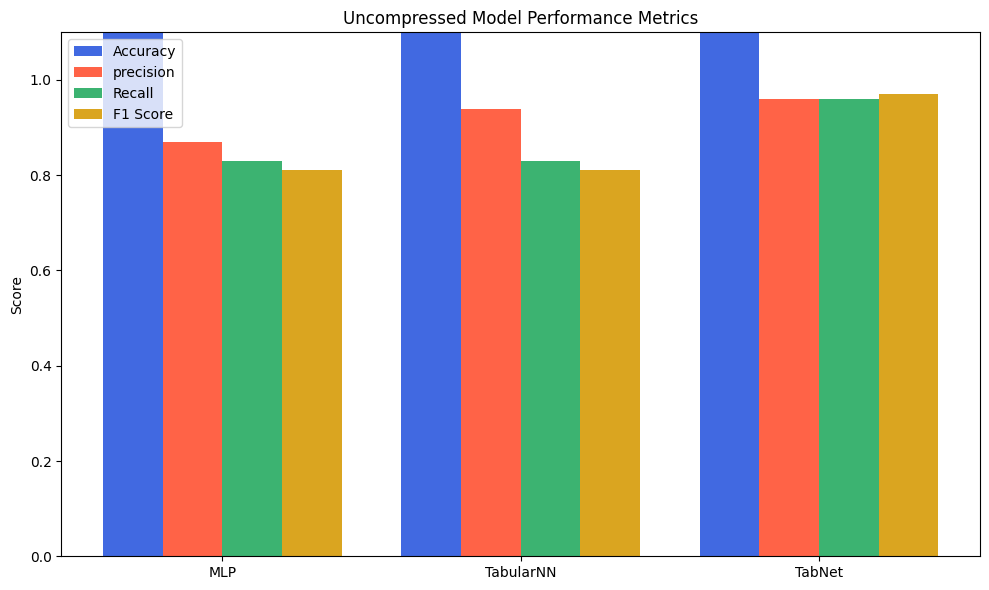

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['MLP', 'TabularNN', 'TabNet']

# Metrics for each model
accuracy = [98.45,99.43 , 99.15]
precision = [0.87, 0.94, 0.96]
recall = [0.83, 0.83, 0.96]
f1_score = [0.81, 0.81, 0.97]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='royalblue')
ax.bar(x - 0.5*width, precision, width, label='precision', color='tomato')
ax.bar(x + 0.5*width, recall, width, label='Recall', color='mediumseagreen')
ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='goldenrod')

# Formatting
ax.set_title('Uncompressed Model Performance Metrics')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()